# Content and Objectives

+ Show test of Kolmogorow Smirnow
+ Several distribution can be selected which are then average to show the effect of the CLT
+ Furthermore, distribution of the max. error between empirical cdf and true cdf is shown


# Import

In [1]:
# importing
import numpy as np

from scipy import stats, special

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters

In [3]:
# vector of realizations 
# NOTE: you may adapt this to play with the parameters

N_realizations = int( 50 )

rng = np.random.default_rng()


In [4]:
# some distributions to sample from
# NOTE: You may add some more here
distributions = [
    stats.norm(loc=0, scale=1),
    stats.uniform(loc=-1, scale=2),
    stats.expon(scale=1),
    stats.gamma( a=3, loc=0, scale=1),
    stats.beta( a=1, b=.5, loc=0, scale=1),
]


In [5]:
# select distribution randomly and get their theoretical parameters 
dist = np.random.choice(distributions)

mean, var = dist.stats(moments="mv")

# quantile levels
quantiles = [0.05, 0.5, 0.95]

# theoretical quantiles
Q_theory = dist.ppf( quantiles )

# First: Show Empirical Distributions

+ first samples are generated 
+ then, paramters are being extracted and printed or plotted

In [6]:
# sample population 
X = dist.rvs( size = N_realizations )

### get and plot empirical cdf and true cdf

+ and, yes: the calculation of the empirical cdf is pretty cumbersome, but
+ this may show the different application of the empirical formula

In [7]:
# first get x axis
x_min = np.min( X )
x_max = np.max( X )
delta_x = 0.01
x_values_cdf = np.arange( x_min, x_max + delta_x, delta_x)

# empirical cdf at all points
X_sorted = np.sort( X )
emp_cdf = np.searchsorted( X_sorted, x_values_cdf, side="right") / X_sorted.size

# get theoretical cdf
theo_cdf = dist.cdf( x_values_cdf )


### plot cdf and empirical cdf

Text(0.5, 0, '$x$')

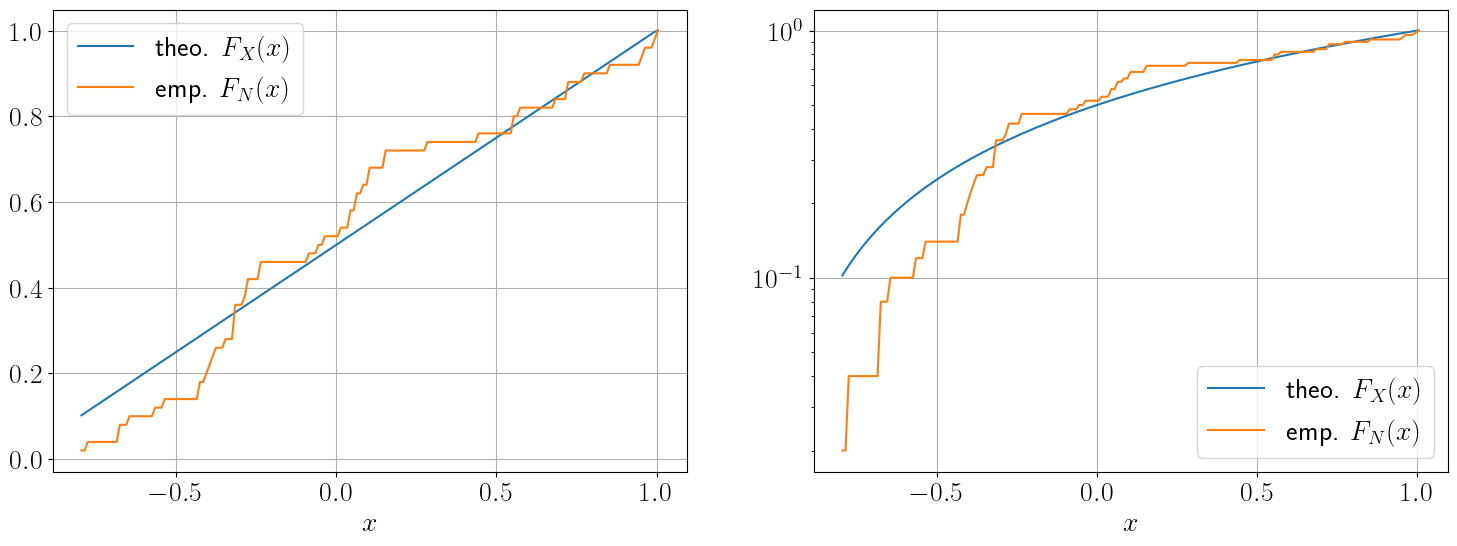

In [8]:
plt.subplot(121)
plt.plot( x_values_cdf, theo_cdf, label='theo. $F_X(x)$')
plt.plot( x_values_cdf, emp_cdf, label='emp. $F_N(x)$')
plt.grid( True ) 
plt.legend( )
plt.xlabel('$x$')

plt.subplot(122)
plt.semilogy( x_values_cdf, theo_cdf, label='theo. $F_X(x)$')
plt.semilogy( x_values_cdf, emp_cdf, label='emp. $F_N(x)$')
plt.grid( True ) 
plt.legend( )
plt.xlabel('$x$')

# Check and Visualize Kolmogorow Distribution

In [9]:
# number of trials for finding the distribution
N_trials = int( 1e5 )

# we may redefine N_realizations if convenient
N_realizations = int( 1e2 ) 

### first generate a lot of difference between cfds

In [10]:
# init array for storing the N_trials differences
max_difference = np.zeros( N_trials )

# loop for trials
for _n in range( N_trials ): 
    
    # get samples
    X = dist.rvs( size = N_realizations )

    # first get x axis
    x_min = np.min( X )
    x_max = np.max( X )
    delta_x = 0.01
    x_values_cdf = np.arange( x_min, x_max + delta_x, delta_x)

    # empirical cdf at all points
    X_sorted = np.sort( X )
    emp_cdf = np.searchsorted( X_sorted, x_values_cdf, side="right") / X_sorted.size

    # get theoretical cdf
    theo_cdf = dist.cdf( x_values_cdf )

    # find max difference
    max_difference[ _n ] = np.sqrt(N_realizations) * np.max( np.abs( emp_cdf - theo_cdf ) )


### do the plotting

Text(0.5, 1.0, 'Histogram/PDF of Kolmogorow distribution')

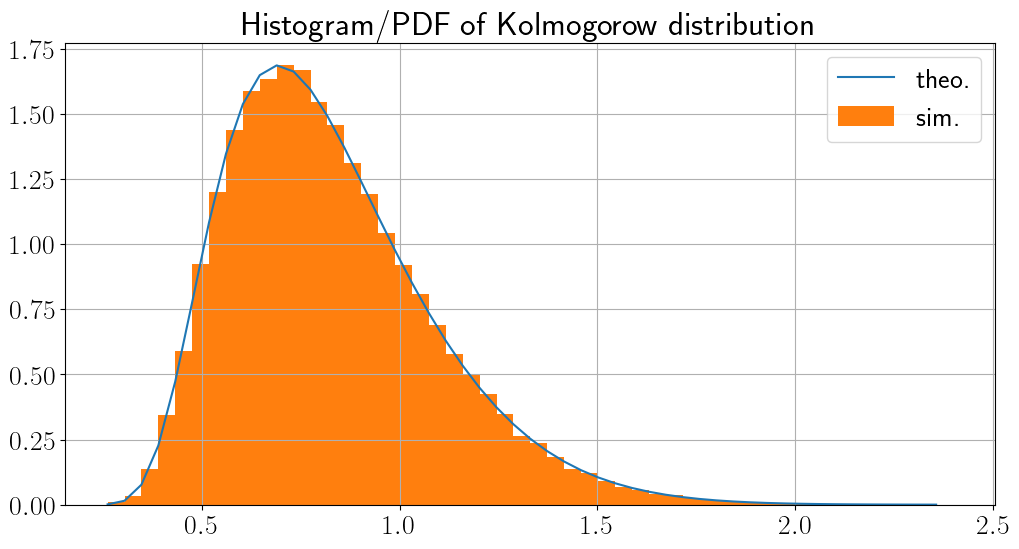

In [11]:
# plot the histogram and the theoretical Kolmogorow cdf
[ hist_diff, bins_diff ] = np.histogram( max_difference, bins=50, density=True )

pdf_diff_theo = stats.kstwobign.pdf( bins_diff[1:] )

plt.figure( figsize=(12,6) )
plt.plot( bins_diff[:-1], pdf_diff_theo, label='theo.')
plt.hist( max_difference, density=True, bins=50, label='sim.' )
plt.grid( True )
plt.legend()
plt.title('Histogram/PDF of Kolmogorow distribution')
#plt.savefig('Kolmogorow_Smirnow.pdf', dpi = 300 )

# Apply Kolmogorow-Smirnow Test

In [12]:
# we may redefine N_realizations if convenient
N_realizations = int( 20 ) 

### sample or fix distributions

In [13]:
dist_for_sampling = np.random.choice(distributions)

if 1:
    dist_for_test = dist_for_sampling
else:
    dist_for_test = np.random.choice(distributions)

# sample population 
X = dist_for_sampling.rvs( size = N_realizations )

print('-----')
print('Distribution for sampling: \t', dist_for_sampling.dist.name, ' with parameters ', dist_for_sampling.kwds )
print('Distribution for testing: \t', dist_for_test.dist.name , ' with parameters ', dist_for_test.kwds )
print('-----\n')

-----
Distribution for sampling: 	 expon  with parameters  {'scale': 1}
Distribution for testing: 	 expon  with parameters  {'scale': 1}
-----



### get cdfs

In [14]:
# first get x axis
x_min = np.min( X )
x_max = np.max( X )
delta_x = 0.01
x_values_cdf = np.arange( x_min, x_max + delta_x, delta_x)

# empirical cdf at all points
X_sorted = np.sort( X )
emp_cdf = np.searchsorted( X_sorted, x_values_cdf, side="right") / X_sorted.size

# get theoretical cdf
theo_cdf = dist_for_test.cdf( x_values_cdf )


### plot cdfs

Text(0.5, 0, '$x$')

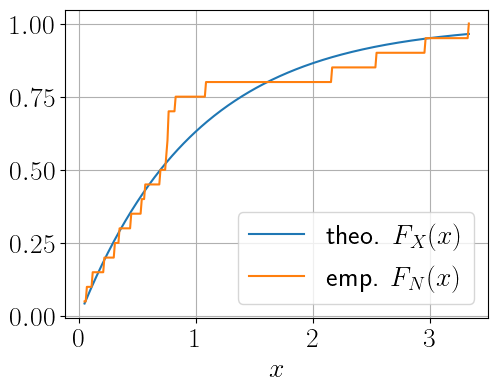

In [15]:
plt.figure( figsize=(12,4))
plt.subplot(121)
plt.plot( x_values_cdf, theo_cdf, label='theo. $F_X(x)$')
plt.plot( x_values_cdf, emp_cdf, label='emp. $F_N(x)$')
plt.grid( True ) 
plt.legend( )
plt.xlabel('$x$')

### determine quantile and test statistic

In [16]:
# fix niveau alpha and get 1-alpha quantile 
alpha = 0.05
z_1_alpha = stats.kstwobign.ppf( 1 - alpha )

In [17]:
# determine values of empirical cdf at sample points ony
emp_cdf_values = np.arange(1, len(X_sorted) + 1) / len(X_sorted)
emp_cdf_values_shifted = np.concatenate( ( [0], emp_cdf_values[:-1] ) )


In [18]:
# samples of test cdf at the accoriding points
cdf_true_samples = dist_for_test.cdf( X_sorted )

# now use defintions/vectors as in the lecture slides
d_1 = np.abs( emp_cdf_values - cdf_true_samples )
d_2 = np.abs( emp_cdf_values_shifted - cdf_true_samples )

d = np.max( [ np.max( d_1 ), np.max( d_2 ) ]  )

if np.sqrt( N_realizations ) * d > z_1_alpha:
    decision = 1
else:
    decision = 0

In [19]:
print('Quantile of Kolmogorow: \t', z_1_alpha)
print('Test statistics: \t\t', np.sqrt( N_realizations ) * d )
print()

if decision == 1:
    print('The test would decide H_1, i.e., decline H_0 on the niveau {}'.format( alpha) )
else:
    print('The test would not decline (aka would "accept") H_0 on the niveau {}.'.format( alpha) )

Quantile of Kolmogorow: 	 1.3580986393225505
Test statistics: 		 0.8632580985392692

The test would not decline (aka would "accept") H_0 on the niveau 0.05.
